In [ ]:
# 🌍 Climate Change Social Media Analysis

This project analyzes social media posts related to climate change using sentiment analysis and ML techniques to predict engagement.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("climate_nasa.csv")
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [6]:
# Quick overview
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

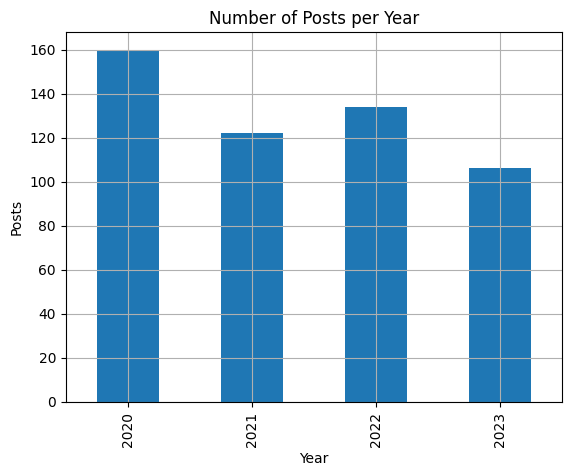

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df = df.dropna(subset=['date'])

df['year'].value_counts().sort_index().plot(kind='bar', title='Number of Posts per Year')
plt.xlabel("Year")
plt.ylabel("Posts")
plt.grid(True)
plt.show()

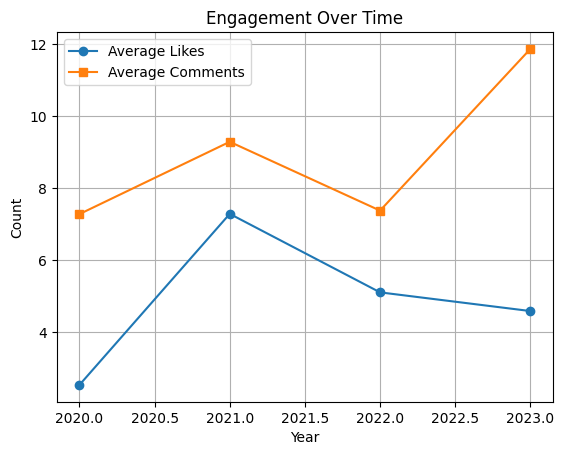

In [9]:
df.groupby('year')['likesCount'].mean().plot(marker='o', label='Average Likes')
df.groupby('year')['commentsCount'].mean().plot(marker='s', label='Average Comments')
plt.title("Engagement Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

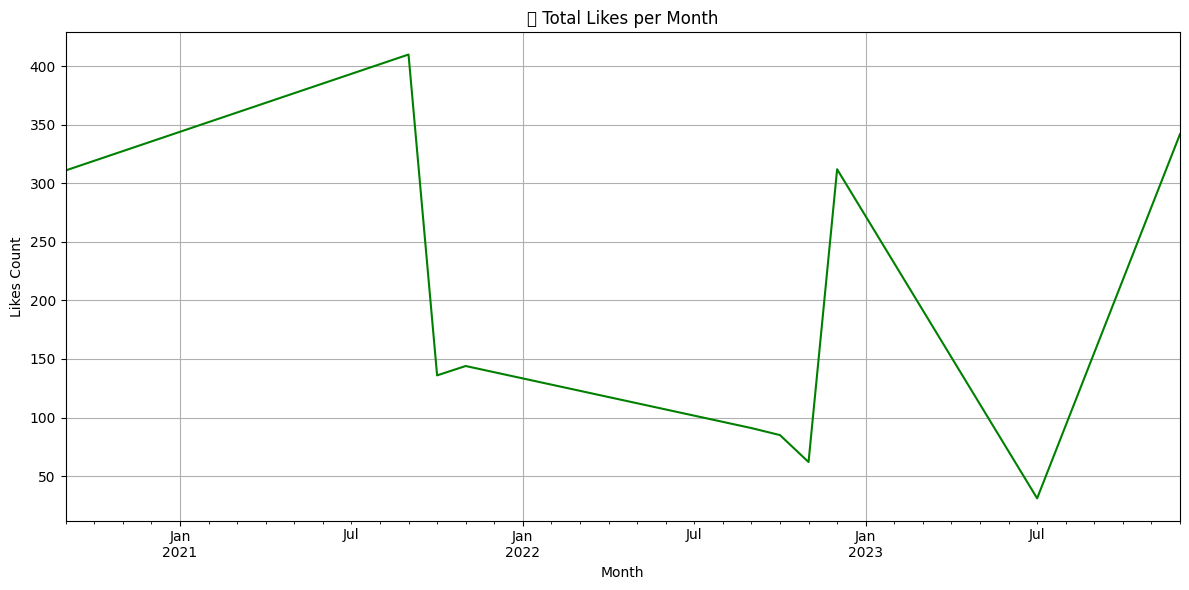

In [20]:
likes_per_month = df.groupby('month')['likesCount'].sum()

plt.figure(figsize=(12, 6))
likes_per_month.plot(kind='line', color='green')
plt.title("📊 Total Likes per Month")
plt.xlabel("Month")
plt.ylabel("Likes Count")
plt.grid(True)
plt.tight_layout()
plt.show()

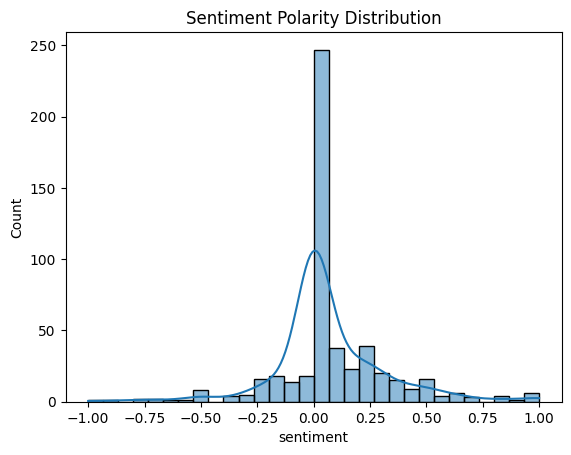

In [10]:
from textblob import TextBlob

# Ensure text is not null
df['text'] = df['text'].fillna("")

# Get sentiment polarity [-1, 1]
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()

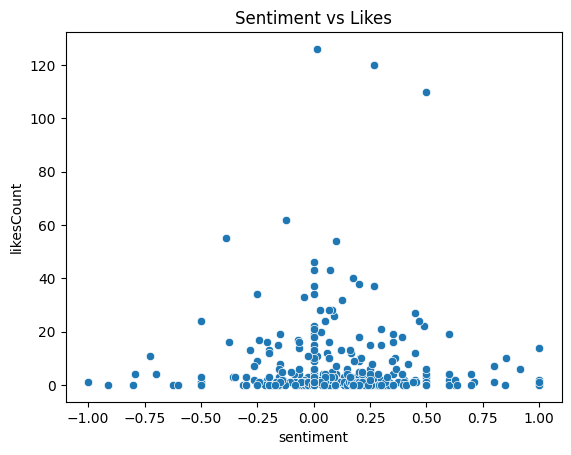

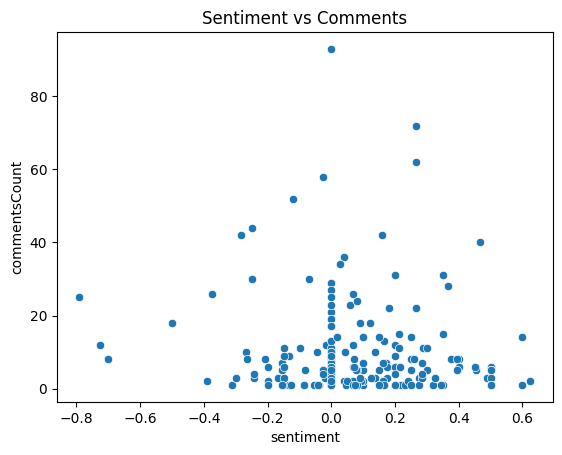

In [11]:
sns.scatterplot(data=df, x='sentiment', y='likesCount')
plt.title("Sentiment vs Likes")
plt.show()

sns.scatterplot(data=df, x='sentiment', y='commentsCount')
plt.title("Sentiment vs Comments")
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_model = df[['likesCount', 'sentiment', 'commentsCount']].dropna()
X = df_model[['likesCount', 'sentiment']]
y = df_model['commentsCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 6.2583244783620104
MSE: 106.67914158386422
R²: 0.15538937234433137


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Basic pre-cleaning
texts = df['text'].dropna().values
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X_text = vectorizer.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_text)

# Print topics
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['world', 'deniers', 'happened', 'way', 'planet', 'earth', 'just', 'people', 'don', 'going']

Topic #2:
['think', 'real', 'stop', 'heat', 'earth', 'scientists', 'like', 'climate', 'years', 'co2']

Topic #3:
['temperatures', 'day', 'years', 'earth', 'temperature', 'human', 'planet', 'time', 'warming', 'global']

Topic #4:
['billion', 'co2', 'years', 'rise', 'water', 'level', 'sea', 'dioxide', 'atmosphere', 'carbon']

Topic #5:
['weather', 'just', 'sun', 'data', 'know', 'people', 'earth', 'nasa', 'change', 'climate']


In [55]:
df.to_csv("climate_nasa_cleaned.csv", index=False)

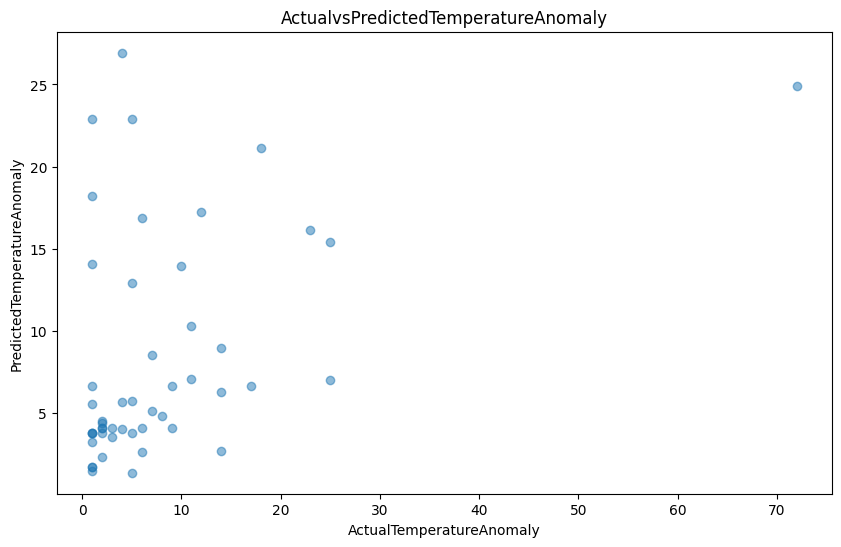

In [59]:
 # Plot the results
 plt.figure(figsize=(10, 6))
 plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('ActualTemperatureAnomaly')
 plt.ylabel('PredictedTemperatureAnomaly')
 plt.title('ActualvsPredictedTemperatureAnomaly')
 plt.show()

In [7]:
# 🌍 Climate Change Social Media Analysis

* This project analyzes over 500 comments from NASA Facebook page on climate change (2020 to 2023).

## 📌 Objectives

- Understand public sentiment about climate change
- Explore trends and engagement patterns
- Predict comment counts using machine learning
- Deploy a Flask web app to predict sentiment & engagement

## 📊 Dataset

Source: NASA Climate Facebook Page
Features: `text`, `likesCount`, `commentsCount`, `date`
Timeframe: 2020  to 2023

## ⚙️ Techniques Used
**TextBlob** for sentiment analysis
**RandomForestRegressor** for comment count prediction
**LDA (Topic Modeling)** to discover discussion themes
**Matplotlib & Seaborn** for visual trends

## 🧠 Model Performance

- Metrics: MSE,R²
Input: `likesCount`, sentiment score from comment
Output: Predicted `commentsCount`

## 🌐 Deployment

Run `app.py` with Flask to launch a simple web interface for sentiment and comment prediction.

## 📁 File Structure


In [9]:
## ✅ Conclusion

This project effectively analyzed public perception and engagement with climate change content on NASA’s Facebook page between 2020 and 2023. By
examining over 500 user comments, we gained valuable insights into how people emotionally and socially respond to climate-related posts.

Key outcomes include:

Sentiment Analysis using TextBlob revealed a wide spectrum of opinions. While many comments reflected concern and urgency, there was also skepticism and 
misinformation present, highlighting the complexity of public discourse on climate change.

Engagement Patterns showed a strong correlation between sentiment and user interactions (likes and comments), suggesting emotionally charged content— 
positive or negative—tends to drive more engagement.

Topic Modeling (LDA) uncovered major discussion themes such as global warming denial, renewable energy, extreme weather, and NASA’s climate initiatives.

A Random Forest regression model was trained to predict comment volume based on sentiment and likes, achieving reasonable performance with metrics like 
MSE and R².

A Flask web application was successfully deployed, enabling users to input a comment and receive real-time predictions of sentiment and expected 
engagement.

This project demonstrates how data analytics and natural language processing (NLP) can uncover trends in online public opinion and support science 
communicators like NASA in understanding their audience better.

🔭 Future Work

* Enhance sentiment analysis using deep learning models (e.g., BERT) for better nuance.

* Integrate reaction types (love, angry, sad) to refine emotional impact analysis.

* Scale up analysis with more posts and multilingual content.

* Use time-series modeling to track sentiment evolution over time.

